<a href="https://colab.research.google.com/github/pedroafleite/landsat/blob/main/landsat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [532]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [533]:
sat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/landsat/sat.trn", sep=' ', header=None)
print(sat.shape)
sat_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/landsat/sat.tst", sep=' ', header=None)
print(sat_test.shape)

(4435, 37)
(2000, 37)


In [534]:
sat.rename(columns={36: 'Class'}, inplace=True)

In [535]:
sat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,Class
0,92,115,120,94,84,102,106,79,84,102,102,83,101,126,133,103,92,112,118,85,84,103,104,81,102,126,134,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,102,79,92,112,118,85,84,103,104,81,84,99,104,78,88,121,128,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,102,79,84,103,104,81,84,99,104,78,84,99,104,81,84,107,113,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,98,76,84,99,104,78,84,99,104,81,76,99,104,81,84,99,104,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,102,79,84,99,104,81,76,99,104,81,76,99,108,85,84,99,104,79,84,103,104,79,79,107,109,87,3


In [536]:
sat['Class'].value_counts()

1    1072
7    1038
3     961
2     479
5     470
4     415
Name: Class, dtype: int64

## Binary Classification

One frame of Landsat MSS imagery consists of four digital images of the same scene in different spectral bands. Two of these are in the visible region (corresponding approximately to green and red regions of the visible spectrum) and two are in the (near) infra-red. Each pixel is a 8-bit binary word, with 0 corresponding to black and 255 to white. The spatial resolution of a pixel is about 80m x 80m. Each image contains 2340 x 3380 such pixels.

The database is a (tiny) sub-area of a scene, consisting of 82 x 100 pixels. Each line of data corresponds to a 3x3 square neighbourhood of pixels completely contained within the 82x100 sub-area. Each line contains the pixel values in the four spectral bands (converted to ASCII) of each of the 9 pixels in the 3x3 neighbourhood and a number indicating the classification label of the central pixel. The number is a code for the following classes:


Remember that Number Class:

1 red soil

2 cotton crop

3 grey soil

4 damp grey soil

5 soil with vegetation stubble

6 mixture class (all types present)

7 very damp grey soil

In [537]:
txt = ['top_left1', 'top_left2', 'top_left3', 'top_left4', 
       'top_center1', 'top_center2', 'top_center3', 'top_center4',
       'top_right1', 'top_right2', 'top_right3', 'top_right4',
       'middle_left1', 'middle_left2', 'middle_left3', 'middle_left4', 
       'middle_center1', 'middle_center2', 'middle_center3', 'middle_center4',
       'middle_right1', 'middle_right2', 'middle_right3', 'middle_right4',
       'bottom_left1', 'bottom_left2', 'bottom_left3', 'bottom_left4', 
       'bottom_center1', 'bottom_center2', 'bottom_center3', 'bottom_center4',
       'bottom_right1', 'bottom_right2', 'bottom_right3', 'bottom_right4', 'Class']
sat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/landsat/sat.trn", sep=' ', dtype=str, names=txt)
sat

,top_left1,top_left2,top_left3,top_left4,top_center1,top_center2,top_center3,top_center4,top_right1,top_right2,top_right3,top_right4,middle_left1,middle_left2,middle_left3,middle_left4,middle_center1,middle_center2,middle_center3,middle_center4,middle_right1,middle_right2,middle_right3,middle_right4,bottom_left1,bottom_left2,bottom_left3,bottom_left4,bottom_center1,bottom_center2,bottom_center3,bottom_center4,bottom_right1,bottom_right2,bottom_right3,bottom_right4,Class
0,92,115,120,94,84,102,106,79,84,102,102,83,101,126,133,103,92,112,118,85,84,103,104,81,102,126,134,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,102,79,92,112,118,85,84,103,104,81,84,99,104,78,88,121,128,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,102,79,84,103,104,81,84,99,104,78,84,99,104,81,84,107,113,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,98,76,84,99,104,78,84,99,104,81,76,99,104,81,84,99,104,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,102,79,84,99,104,81,76,99,104,81,76,99,108,85,84,99,104,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,108,96,59,75,109,96,67,87,113,96,67,95,109,92,63,79,108,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,108,88,67,87,113,96,67,95,109,92,75,99,104,83,66,83,108,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,100,81,67,95,109,92,75,99,104,83,75,95,100,79,66,87,104,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,108,88,75,99,104,83,75,95,100,79,71,91,100,83,63,87,104,89,70,100,104,85,70,91,104,85,4


In each line of data the four spectral values for the top-left pixel are given first followed by the four spectral values for the top-middle pixel and then those for the top-right pixel, and so on with the pixels read out in sequence left-to-right and top-to-bottom. 

 Thus, the four spectral values for the central pixel are given by attributes 17,18,19 and 20 (which would be 'middle_center1', 'middle_center2', 'middle_center3', 'middle_center4'). If you like you can use only these four attributes, while ignoring the others. This avoids the problem which arises when a 3x3 neighbourhood straddles a boundary.

In [538]:
sat_band1 = sat[['top_left1', 'top_center1', 'top_right1', 
                 'middle_left1', 'middle_center1', 'middle_right1',
                 'bottom_left1', 'bottom_center1', 'bottom_right1']].astype('int')
sat_band2 = sat[['top_left2', 'top_center2', 'top_right2', 
                 'middle_left2', 'middle_center2', 'middle_right2', 
                 'bottom_left2', 'bottom_center2', 'bottom_right2']].astype('int')
sat_band3 = sat[['top_left3', 'top_center3', 'top_right3', 
                 'middle_left3', 'middle_center3', 'middle_right3', 
                 'bottom_left3', 'bottom_center3', 'bottom_right3']].astype('int')
sat_band4 = sat[['top_left4', 'top_center4', 'top_right4', 
                 'middle_left4', 'middle_center4', 'middle_right4', 
                 'bottom_left4', 'bottom_center4', 'bottom_right4']].astype('int')

In [539]:
sat_band1.values

array([[ 92,  84,  84, ..., 102,  88,  84],
       [ 84,  84,  80, ...,  88,  84,  84],
       [ 84,  80,  84, ...,  84,  84,  84],
       ...,
       [ 68,  71,  71, ...,  66,  63,  70],
       [ 71,  71,  76, ...,  63,  70,  70],
       [ 71,  76,  80, ...,  70,  70,  63]])

In [540]:
sat_band1.iloc[3000:3001]

,top_left1,top_center1,top_right1,middle_left1,middle_center1,middle_right1,bottom_left1,bottom_center1,bottom_right1
3000,60,53,64,64,60,71,63,59,71


In [541]:
# soil with vegetation stubble
dfs = sat_band1.iloc[3000:3001].to_numpy()
dfs

array([[60, 53, 64, 64, 60, 71, 63, 59, 71]])

In [542]:
dfs = np.reshape(dfs, (3,3))
dfs

array([[60, 53, 64],
       [64, 60, 71],
       [63, 59, 71]])

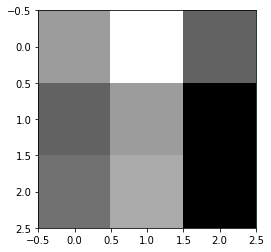

In [543]:
import matplotlib

plt.imshow(dfs, cmap = matplotlib.cm.binary, interpolation='nearest')

However, that is somewhat fruitless, since as said in the documentation: "the data is given in random order and certain lines of data have been removed so you cannot reconstruct the original image from this dataset." Therefore, the machine learning algorithm would have to work without the image, since we cannot arrange the whole image in any consistant way.

# Binary Classification

Let's make a Binary Classification in which we find class of 5 (soil with vegetation stubble) among classes of non-5 (non-soil with vegetation stubble).

First thing, it might be interesting to divide the 4 Bands all through, instead of line by line.

In [544]:
sat_band1.head()

,top_left1,top_center1,top_right1,middle_left1,middle_center1,middle_right1,bottom_left1,bottom_center1,bottom_right1
0,92,84,84,101,92,84,102,88,84
1,84,84,80,92,84,84,88,84,84
2,84,80,84,84,84,84,84,84,84
3,80,84,80,84,84,76,84,84,84
4,84,80,80,84,76,76,84,84,79


In [545]:
sat_band1 = sat_band1.to_numpy()
sat_band2 = sat_band2.to_numpy()
sat_band3 = sat_band3.to_numpy()
sat_band4 = sat_band4.to_numpy()

In [546]:
sat_band1[0]

array([ 92,  84,  84, 101,  92,  84, 102,  88,  84])

In [547]:
band1, band2, band3, band4 = [], [], [], []

for i in range(0,len(sat_band1)):
  array = sat_band1[i]
  array = np.reshape(array, (3,3))
  band1.append(array)

for i in range(0,len(sat_band2)):
  array = sat_band2[i]
  array = np.reshape(array, (3,3))
  band2.append(array)

for i in range(0,len(sat_band3)):
  array = sat_band3[i]
  array = np.reshape(array, (3,3))
  band3.append(array)

for i in range(0,len(sat_band4)):
  array = sat_band4[i]
  array = np.reshape(array, (3,3))
  band4.append(array)

In [548]:
band1[0]

array([[ 92,  84,  84],
       [101,  92,  84],
       [102,  88,  84]])

In [549]:
len(band1)

4435

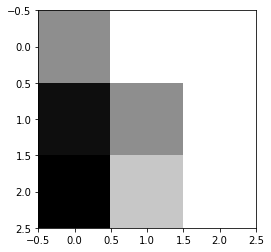

In [550]:
plt.imshow(band1[0], cmap = matplotlib.cm.binary, interpolation='nearest')

In [551]:
sat.columns

Index(['top_left1', 'top_left2', 'top_left3', 'top_left4', 'top_center1',
       'top_center2', 'top_center3', 'top_center4', 'top_right1', 'top_right2',
       'top_right3', 'top_right4', 'middle_left1', 'middle_left2',
       'middle_left3', 'middle_left4', 'middle_center1', 'middle_center2',
       'middle_center3', 'middle_center4', 'middle_right1', 'middle_right2',
       'middle_right3', 'middle_right4', 'bottom_left1', 'bottom_left2',
       'bottom_left3', 'bottom_left4', 'bottom_center1', 'bottom_center2',
       'bottom_center3', 'bottom_center4', 'bottom_right1', 'bottom_right2',
       'bottom_right3', 'bottom_right4', 'Class'],
      dtype='object')

In [552]:
sat_band1 = sat[['top_left1', 'top_center1', 'top_right1', 
                 'middle_left1', 'middle_center1', 'middle_right1',
                 'bottom_left1', 'bottom_center1', 'bottom_right1', 'Class']].astype('int')
sat_band2 = sat[['top_left2', 'top_center2', 'top_right2', 
                 'middle_left2', 'middle_center2', 'middle_right2', 
                 'bottom_left2', 'bottom_center2', 'bottom_right2', 'Class']].astype('int')
sat_band3 = sat[['top_left3', 'top_center3', 'top_right3', 
                 'middle_left3', 'middle_center3', 'middle_right3', 
                 'bottom_left3', 'bottom_center3', 'bottom_right3', 'Class']].astype('int')
sat_band4 = sat[['top_left4', 'top_center4', 'top_right4', 
                 'middle_left4', 'middle_center4', 'middle_right4', 
                 'bottom_left4', 'bottom_center4', 'bottom_right4', 'Class']].astype('int')

In [553]:
# Using only middle_center1
#band_1 = sat[['middle_center1', 'Class']].astype('int')
band_01 = sat_band1.to_numpy() #band_1[['middle_center1']].to_numpy()

# Using only middle_center2
#band_2 = sat[['middle_center2', 'Class']].astype('int')
band_02 = sat_band2.to_numpy() #band_2[['middle_center2']].to_numpy()

# Using only middle_center3
#band_3 = sat[['middle_center3', 'Class']].astype('int')
band_03 = sat_band3.to_numpy() #band_3[['middle_center3']].to_numpy()

# Using only middle_center2
#band_4 = sat[['middle_center4', 'Class']].astype('int')
band_04 = sat_band4.to_numpy() #band_4[['middle_center4']].to_numpy()
band_04

array([[ 94,  79,  83, ..., 100,  87,   3],
       [ 79,  83,  79, ...,  87,  79,   3],
       [ 83,  79,  79, ...,  79,  79,   3],
       ...,
       [ 96,  88,  81, ...,  89,  85,   4],
       [ 88,  81,  88, ...,  85,  85,   4],
       [ 81,  88,  85, ...,  85,  81,   4]])

In [554]:
#Change the Class. Some classes are better seen
yband1_5 = (sat_band1['Class'] == 3) # True for all 5s. False for others.
yband2_5 = (sat_band2['Class'] == 3)
yband3_5 = (sat_band3['Class'] == 3)
yband4_5 = (sat_band4['Class'] == 3)
yband4_5

0        True
1        True
2        True
3        True
4        True
        ...  
4430    False
4431    False
4432    False
4433    False
4434    False
Name: Class, Length: 4435, dtype: bool

In [555]:
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
sgd_clf1 = SGDClassifier(random_state=42, eta0=1, learning_rate='adaptive')
sgd_clf2 = SGDClassifier(random_state=42, eta0=1, learning_rate='adaptive')
sgd_clf3 = SGDClassifier(random_state=42, eta0=1, learning_rate='adaptive')
sgd_clf4 = SGDClassifier(random_state=42, eta0=1, learning_rate='adaptive')
sgd_clf1.fit(band_01, yband1_5)
sgd_clf2.fit(band_02, yband2_5)
sgd_clf3.fit(band_03, yband3_5)
sgd_clf4.fit(band_04, yband4_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [556]:
print(sgd_clf1.coef_)
print(sgd_clf2.coef_)
print(sgd_clf3.coef_)
print(sgd_clf4.coef_)

[[   0.49124521    6.9226923    -0.58528748    5.53213937    8.83307529
     8.8668251     2.56241046    4.0000086     5.50178378 -165.82837576]]
[[ 2.10112851  0.75882311  1.04397052  5.62026876  8.28228251  6.45714005
   0.99263974  5.61882357  2.0968551  73.13775571]]
[[ 1.441788    0.27236499  2.41045144  1.2669628   1.65782111  0.74390833
   4.67478354 -1.35349917  1.63259581 50.55778891]]
[[ 0.72270851  0.14165144  0.45441613 -0.04484194 -0.20262059  0.24448549
   1.27241926 -0.44459822  0.4420663  12.01271083]]


In [557]:
band_01[0]

array([ 92,  84,  84, 101,  92,  84, 102,  88,  84,   3])

In [558]:
detect1, detect2, detect3, detect4 = [],[],[],[]

for i in range(0,len(band_01)):
  pred1 = sgd_clf1.predict([band_01[i]])
  pred2 = sgd_clf2.predict([band_02[i]])
  pred3 = sgd_clf3.predict([band_03[i]])
  pred4 = sgd_clf4.predict([band_04[i]])
  detect1.append(pred1)
  detect2.append(pred2)
  detect3.append(pred3)
  detect4.append(pred4)

In [559]:
unique, counts = np.unique(detect1, return_counts=True)
dict(zip(unique, counts))

{False: 3477, True: 958}

In [560]:
sat['Class'].value_counts() # True positives

1    1072
7    1038
3     961
2     479
5     470
4     415
Name: Class, dtype: int64

In [561]:
detect1[0]

array([ True])

In [562]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf1, band_01, yband1_5, cv=3, scoring="accuracy")

array([0.97227857, 0.94384303, 0.80311231])

In [563]:
cross_val_score(sgd_clf2, band_02, yband2_5, cv=3, scoring="accuracy")

array([0.89993239, 0.76860622, 0.33626522])

In [564]:
cross_val_score(sgd_clf3, band_03, yband3_5, cv=3, scoring="accuracy")

array([0.70453009, 0.71515562, 0.23951286])

In [565]:
cross_val_score(sgd_clf4, band_04, yband4_5, cv=3, scoring="accuracy")

array([0.54901961, 0.76928281, 0.7165088 ])

Between 70.52-86.40 % accuracy (ratio of correct predictions).

In [566]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [567]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, band_01, yband1_5, cv=3, scoring="accuracy")

array([0.60784314, 0.91474966, 0.82746955])

In [568]:
cross_val_score(never_5_clf, band_02, yband2_5, cv=3, scoring="accuracy")

array([0.60784314, 0.91474966, 0.82746955])

In [569]:
cross_val_score(never_5_clf, band_03, yband3_5, cv=3, scoring="accuracy")

array([0.60784314, 0.91474966, 0.82746955])

In [570]:
cross_val_score(never_5_clf, band_04, yband4_5, cv=3, scoring="accuracy")

array([0.60784314, 0.91474966, 0.82746955])

Between 86.67-91.74 % accuracy (ratio of correct predictions).

In [571]:
from sklearn.model_selection import cross_val_predict
y_train_pred1 = cross_val_predict(sgd_clf1, band_01, yband1_5, cv=3)
y_train_pred2 = cross_val_predict(sgd_clf2, band_02, yband2_5, cv=3)
y_train_pred3 = cross_val_predict(sgd_clf3, band_03, yband3_5, cv=3)
y_train_pred4 = cross_val_predict(sgd_clf4, band_04, yband4_5, cv=3)

In [572]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yband1_5, y_train_pred1)

array([[3224,  250],
       [ 165,  796]])

## Precision and Recall

$Precision = \frac{True Positive}{True Positive + False Positive} = \frac{True Positive}{Total Predicted Positive} $

$Recall = \frac{True Positive}{True Positive + False Negative} = \frac{True Positive}{Total Actual Positive}$

$F1 = 2\times\frac{Precision\times Recall}{Precision + Recall}$

True positive = `yband1_5`

In [573]:
 #These are the true positives (= 470), since they are taken directly from the original dataset.
print(yband1_5.value_counts())

False    3474
True      961
Name: Class, dtype: int64


In [574]:
detect1 = pd.DataFrame(detect1) #These are the False positives (taken from the SGDClassifier)
detect2 = pd.DataFrame(detect2)
detect3 = pd.DataFrame(detect3)
detect4 = pd.DataFrame(detect4)

print(detect1.value_counts(), '\n')
print(detect2.value_counts(), '\n')
print(detect3.value_counts(), '\n')
print(detect4.value_counts(), '\n')

False    3477
True      958
dtype: int64 

False    3509
True      926
dtype: int64 

False    3536
True      899
dtype: int64 

False    3639
True      796
dtype: int64 



In [575]:
from sklearn.metrics import precision_score
precision_score(yband1_5, detect1) # = 470 / (470 + 334)

0.9029227557411273

In [576]:
precision_score(yband2_5, detect2)

0.6295896328293736

In [577]:
precision_score(yband3_5, detect3)

0.41379310344827586

In [578]:
precision_score(yband4_5, detect4)

0.17964824120603015

In [579]:
from sklearn.metrics import recall_score
recall_score(yband1_5, y_train_pred1) # = 470 / (470 + [4101 - 3965])

0.8283038501560874

In [580]:
recall_score(yband2_5, y_train_pred2) 

0.5296566077003122

In [581]:
recall_score(yband3_5, y_train_pred3) 

0.27055150884495316

In [582]:
recall_score(yband4_5, y_train_pred4) 

0.07492195629552549

In [583]:
from sklearn.metrics import f1_score
f1_score(yband1_5, detect1)

0.9015112037519541

In [584]:
f1_score(yband2_5, detect2)

0.6179120296767355

In [585]:
f1_score(yband3_5, detect3)

0.39999999999999997

In [586]:
f1_score(yband4_5, detect4)

0.16277746158224246

In [587]:
y_scores1 = cross_val_predict(sgd_clf1, band_01, yband1_5, cv=3, method="decision_function")
y_scores2 = cross_val_predict(sgd_clf2, band_02, yband2_5, cv=3, method="decision_function")
y_scores3 = cross_val_predict(sgd_clf3, band_03, yband3_5, cv=3, method="decision_function")
y_scores4 = cross_val_predict(sgd_clf4, band_04, yband4_5, cv=3, method="decision_function")

In [588]:
from sklearn.metrics import precision_recall_curve
precisions1, recalls1, thresholds1 = precision_recall_curve(yband1_5, y_scores1)
precisions2, recalls2, thresholds2 = precision_recall_curve(yband2_5, y_scores2)
precisions3, recalls3, thresholds3 = precision_recall_curve(yband3_5, y_scores3)
precisions4, recalls4, thresholds4 = precision_recall_curve(yband4_5, y_scores4)

In [589]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
  plt.xlabel('Threshold')
  plt.legend(loc='upper left')
  plt.ylim([0,1])

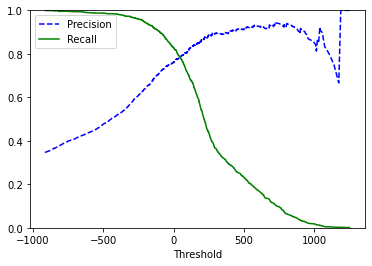

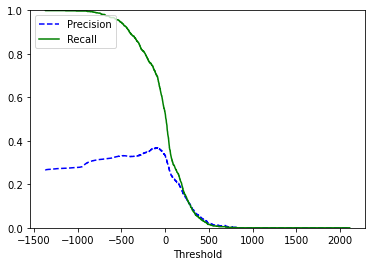

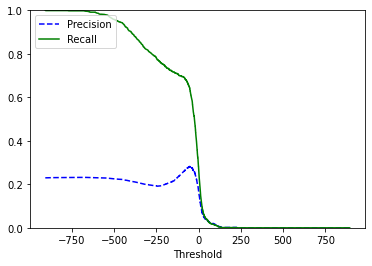

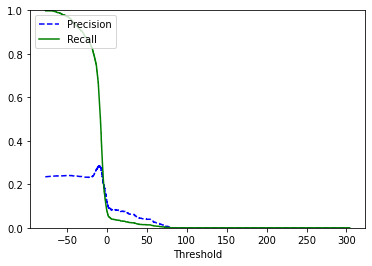

In [590]:
plot_precision_recall_vs_threshold(precisions1, recalls1, thresholds1)
plt.show()
plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2)
plt.show()
plot_precision_recall_vs_threshold(precisions3, recalls3, thresholds3)
plt.show()
plot_precision_recall_vs_threshold(precisions4, recalls4, thresholds4)
plt.show()

In [591]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls[:-1], precisions[:-1], "b-")
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0,1])

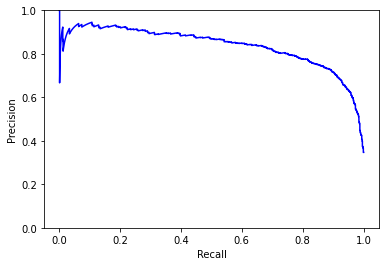

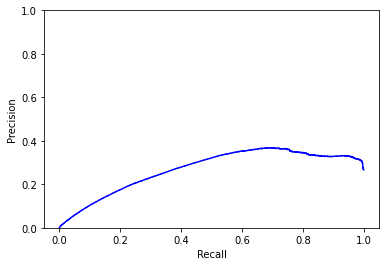

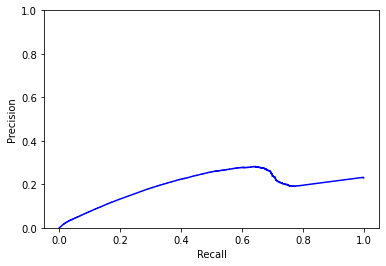

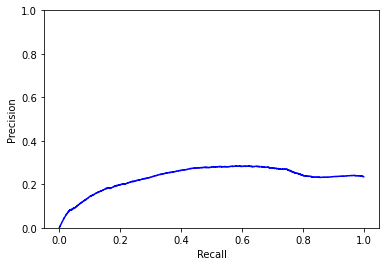

In [592]:
plot_precision_vs_recall(precisions1, recalls1)
plt.show()
plot_precision_vs_recall(precisions2, recalls2)
plt.show()
plot_precision_vs_recall(precisions3, recalls3)
plt.show()
plot_precision_vs_recall(precisions4, recalls4)
plt.show()

This is very bad precision and recall. A 0.20 precision and recall is pure randomness, considering that we are sarching for one class among five (that is 0.2/1.0)